In [2]:
import sys
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics 

In [3]:
# Se verfica entorno de ejecución
in_colab = "google.colab" in sys.modules

if in_colab:
    from google.colab import drive

    drive.mount("/content/drive")
    BASE_DIR = "/content/drive/My Drive/Diplo2020 Mentoria/"
else:
    BASE_DIR = "../"

# Leo el corpus

In [4]:
train_data = BASE_DIR + "corpus3.csv"
dataset = pandas.read_csv(train_data)
dataset.head()

,Unnamed: 0,TEXTO,DOCUMENTO,TIPO
0,0,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 001-2018 COOPI C MUN CAR...,AUTO
1,1,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 002-2018 Denuncia R R RA...,AUTO
2,2,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 003-2018 VEDIA FLORES Cr...,AUTO
3,3,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 004-2018 FERNANDEZ Favio...,AUTO
4,4,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 005-2018 ATANOR ADI ref.pdf,AUTO


In [5]:
dataset['TIPO'].value_counts()

AUTO         125
SENTENCIA     25
Name: TIPO, dtype: int64

In [6]:
documentos = dataset['TEXTO']

# Entrenamiento

Vectorizamos los textos

In [7]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(dataset['TEXTO'])

<150x19220 sparse matrix of type '<class 'numpy.float64'>'
	with 204569 stored elements in Compressed Sparse Row format>

In [8]:
# División entre instancias vectorizadas y etiquetas
X, y = vectorizer.transform(dataset["TEXTO"]), dataset["TIPO"]

In [9]:
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

Entrenamos con el modelo Random Forest

In [10]:
  model = ensemble.RandomForestClassifier(random_state=0)
  model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
y_train_pred = model.predict(X_train)

In [12]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

        AUTO       1.00      1.00      1.00        86
   SENTENCIA       1.00      1.00      1.00        19

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [13]:
print(f'Accuracy:{metrics.accuracy_score(y_train, y_train_pred):{0.2}}')
print(f'Precision:{metrics.precision_score(y_train, y_train_pred, average="macro"):{0.2}}')
print(f'Recall:{metrics.recall_score(y_train, y_train_pred, average="macro"):{0.2}}')
print(f'F1 score:{metrics.f1_score(y_train, y_train_pred, average="macro"):{0.2}}')

tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()
print(f'\nMatriz de Confusión \n\tTP:{tp:{3}} \tFP:{fp:{3}} \n\tFN:{fn:{3}} \tTN:{tn:{3}}')

Accuracy:1.0
Precision:1.0
Recall:1.0
F1 score:1.0

Matriz de Confusión 
	TP: 19 	FP:  0 
	FN:  0 	TN: 86


# Validación del modelo

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
print('\nReporte de Clasificiación:\n', metrics.classification_report(y_test, y_test_pred))


Reporte de Clasificiación:
               precision    recall  f1-score   support

        AUTO       0.95      1.00      0.97        39
   SENTENCIA       1.00      0.67      0.80         6

    accuracy                           0.96        45
   macro avg       0.98      0.83      0.89        45
weighted avg       0.96      0.96      0.95        45



In [18]:
print(f'Accuracy:{metrics.accuracy_score(y_test, y_test_pred):{0.2}}')
print(f'Precision:{metrics.precision_score(y_test, y_test_pred, average="macro"):{0.2}}')
print(f'Recall:{metrics.recall_score(y_test, y_test_pred, average="macro"):{0.2}}')
print(f'F1 score:{metrics.f1_score(y_test, y_test_pred, average="macro"):{0.2}}')

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_pred).ravel()
print(f'\nMatriz de Confusión \n\tTP:{tp:{3}} \tFP:{fp:{3}} \n\tFN:{fn:{3}} \tTN:{tn:{3}}')    

Accuracy:0.96
Precision:0.98
Recall:0.83
F1 score:0.89

Matriz de Confusión 
	TP:  4 	FP:  0 
	FN:  2 	TN: 39



Matriz de Confusión


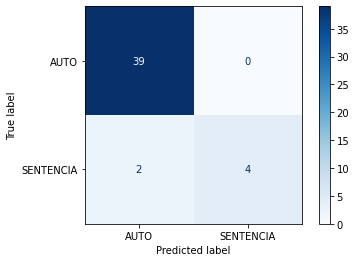

In [19]:
print('\nMatriz de Confusión')
metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


Curva ROC


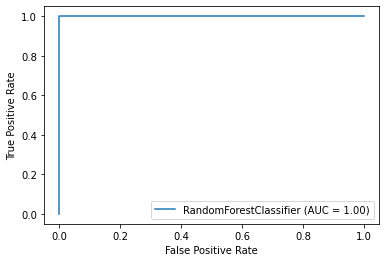

In [20]:
print('\nCurva ROC')
metrics.plot_roc_curve(model, X_test, y_test)    
plt.show()

In [45]:
fpr_rt_lm, tpr_rt_lm, _ = metrics.roc_curve(y_test, y_test_pred, pos_label='AUTO')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

# Predicciones

Ahora quiero predecir un documento nuevo... por ejemplo tomo el primer documento 

In [46]:
dataset[0:1].TIPO, documentos[0:1]

(0    AUTO
 Name: TIPO, dtype: object,
 0    sala electoral comp.originaria tribunal superi...
 Name: TEXTO, dtype: object)

El texto ya vectorizado anteriormente es el siguiente:

In [47]:
X_train[0:1]

<1x19220 sparse matrix of type '<class 'numpy.float64'>'
	with 1029 stored elements in Compressed Sparse Row format>

Si predigo ese documento:

In [48]:
model.predict(X_train[0:1])

array(['AUTO'], dtype=object)

Predice correctamente.

Ahora bien, que pasa si quiero predecir un documento que no está en los ya vectorizados. Tengo que primero vectorizarlo para poder aplicarle el modelo de clasificación.

In [49]:
vectorizer.transform(documentos[0:1])

<1x19220 sparse matrix of type '<class 'numpy.float64'>'
	with 767 stored elements in Compressed Sparse Row format>

In [50]:
model.predict(vectorizer.transform(documentos[0:1]))

array(['AUTO'], dtype=object)

Veo cuales son los documentos que no predice correctamente:

In [51]:
for i in numpy.arange(150):
    tipo = dataset[i:i+1]['TIPO'][i]
    texto = documentos[i:i+1]
    tipo_pred = model.predict(vectorizer.transform(texto))[0]
    
    if tipo != tipo_pred:
        print(i, tipo, model.predict(vectorizer.transform(texto))[0])


126 SENTENCIA AUTO
141 SENTENCIA AUTO
